# Individual assignement - Tommaso Pilotto - 3053169
***
# Task
Classify a given dataset with a Multi-Layer Perceptron (implemented by sklearn.neural_network.MLPClassifier),
than determine whether applying PCA to this dataset is useful, and if so
what number of components you would choose to use. At the end of the analysis, chose an optimal strategy, including the optimal set of parameters for the classifier.
***
# Procedure
1. Introduction
2. Data exploration
3. Note on Multi-layer Perceptron
4. MLPClassifier without PCA 
5. MLPClassifier with PCA
6. Compare the result
7. Conclusion
8. References

# 1. Introduction

#### Import the necessary library

In [1]:
# For data structures
import pandas as pd
import numpy as np

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
from IPython.display import display
import mglearn
import graphviz
from sklearn.utils.multiclass import unique_labels

# For preprocessing of data
from sklearn.preprocessing import StandardScaler

#For dimensionality reduction
from sklearn.decomposition import PCA, KernelPCA

# Multi-layer Perceptron Classifier
from sklearn.neural_network import MLPClassifier

# Random Forest Classifier, used for features importance
from sklearn.ensemble import RandomForestClassifier

# Metrics for evaluating the models
from sklearn.metrics import accuracy_score, confusion_matrix

# Model selection libraries
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, train_test_split

# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline

# Setting colors
cmap = plt.cm.summer
colors = [cmap(i) for i in np.linspace(0.1,0.85,5)]
color = 'tab:green'
cm = [cmap(1.*i/2) for i in [0, 5]]

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
%matplotlib inline

#### Dataset
This dataset is composed of 1200 samples with 20 features each. The first column
is the sample id. The second column in the dataset represents the label. There
are 2 possible values for the labels. The remaining columns are numeric
features. The dataset does not contain any categorical featureas or missing values.

In [2]:
# Read the dataset
df = pd.read_csv('mldata_0013053169.csv')
# Rename the first unnamed column as Sample ID
new_columns = df.columns.values
new_columns[0] = 'Sample ID'
df.columns = new_columns
# Set first column as index
df.set_index('Sample ID', inplace=True)
# Show first five rows
df.head()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
Sample ID,,,,,,,,,,,,,,,,,,,,,
0,0,0.518487,1.842731,0.542830,1.902931,0.799842,-1.841747,-1.284532,0.325088,-0.725874,...,-2.550974,-2.058128,-4.619363,1.608647,-0.958574,-1.547793,2.124656,0.825770,-1.547793,-2.232686
1,1,-0.224236,-1.356523,-5.355245,-3.899482,-0.092388,0.032153,-1.199550,-0.151097,0.489805,...,-1.168192,3.431949,-1.293750,2.824029,-0.153008,4.212042,-1.246721,2.298972,4.212042,-2.184234
2,0,0.187345,0.302333,-5.626108,1.683159,2.852795,-0.487734,-0.578192,-0.102926,0.839097,...,0.784004,0.671973,-1.545901,0.366370,-0.318343,1.973520,-1.960797,4.694399,1.973520,-1.315768
3,1,0.066182,-0.969182,-1.291093,1.256047,2.752234,0.275469,0.083663,0.546082,-0.491205,...,-4.359826,0.723438,-0.557793,1.777874,0.192986,-1.678326,-1.553218,1.648316,-1.678326,1.134475
4,0,2.720926,-1.272913,0.682214,4.116339,3.860953,0.241201,0.177908,0.847746,1.571892,...,0.577778,-1.404351,4.534208,0.598211,0.430342,-1.143065,-2.257255,1.834971,-1.143065,1.443515


In [3]:
# Show some statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,1200.0,0.494167,0.500174,0.000000,0.000000,0.000000,1.000000,1.000000
feature_1,1200.0,0.045331,1.023259,-3.065047,-0.630171,0.043245,0.761692,3.723530
feature_2,1200.0,0.064692,1.977376,-5.552175,-1.324668,-0.035816,1.390630,7.409011
feature_3,1200.0,0.469713,3.312129,-10.323059,-1.689015,0.584852,2.581295,12.361025
feature_4,1200.0,0.824432,3.151491,-7.277016,-1.399534,0.761672,2.831619,13.211070
feature_5,1200.0,0.696126,2.078772,-6.013839,-0.637129,0.725794,2.116904,10.672486
feature_6,1200.0,0.148728,2.237657,-6.555283,-1.392597,0.070019,1.564140,7.462511
feature_7,1200.0,0.121921,1.003803,-3.443465,-0.551685,0.142577,0.834815,3.910899
feature_8,1200.0,0.123838,0.986941,-3.599953,-0.530281,0.155913,0.781617,3.608844
feature_9,1200.0,0.131366,1.020629,-3.354131,-0.550804,0.132641,0.820978,3.611646


#### Load the data

In [4]:
# Create feature matrix, by convention call it X
X = df.drop('label', axis=1)

# Create target vector, by convention call it y
y = df['label']
print(f'The feature matrix has {X.shape[0]} samples and {X.shape[1]} features')

The feature matrix has 1200 samples and 20 features


# 2. Data exploration
The first step is about looking the dataset and explore it.

#### Labels charts
Labels are aproximatelly equally frequent in the dataset, as it possible to see in both pie chart and bar chart.

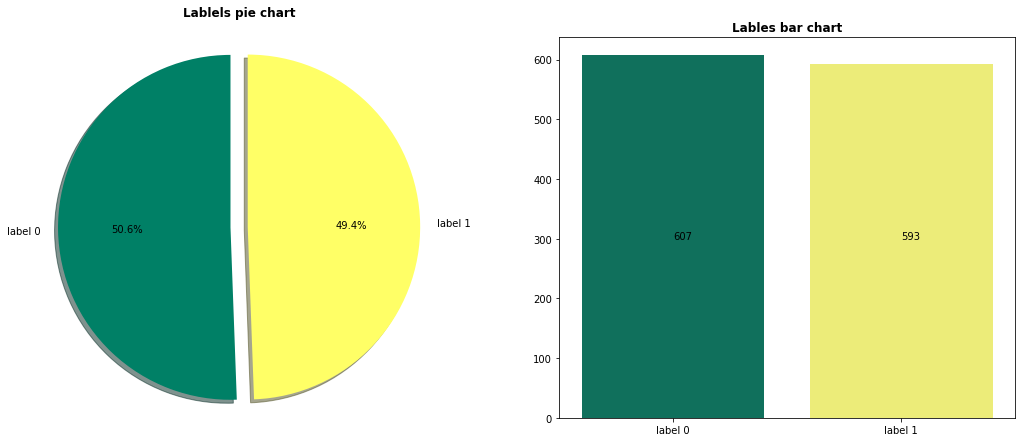

In [5]:
# Convert to numpy
label = y.values

# Calculate how many zeros and ones
zeros = len(label[label==0])
ones = len(label[label==1])

# Set parameters for the plot
labels = ['label 0', 'label 1']
sizes = [zeros, ones]
explode = (0.1, 0.0)

# Create the figure
fig1, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax1, ax2 = ax

# Pie chart
ax1.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, 
        startangle=90, colors=cm)
ax1.set_title(label='Lablels pie chart\n', weight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

# Histogram
sns.barplot(x=labels, y=sizes, ax=ax2, palette=cm)
ax2.set_title(label='Lables bar chart', weight='bold')
ax2.text(x=0, y=300, s=zeros)
ax2.text(x=1, y=300, s=ones)

plt.show()

#### Features Kernel Density Estimation
When dealing with a set of data, another thing you’ll want to do is get a sense for how the variables are distributed. The examinaton of the kernel densities estimates of the 20 features suggests that the data points have approximately a mean equal to $0$.

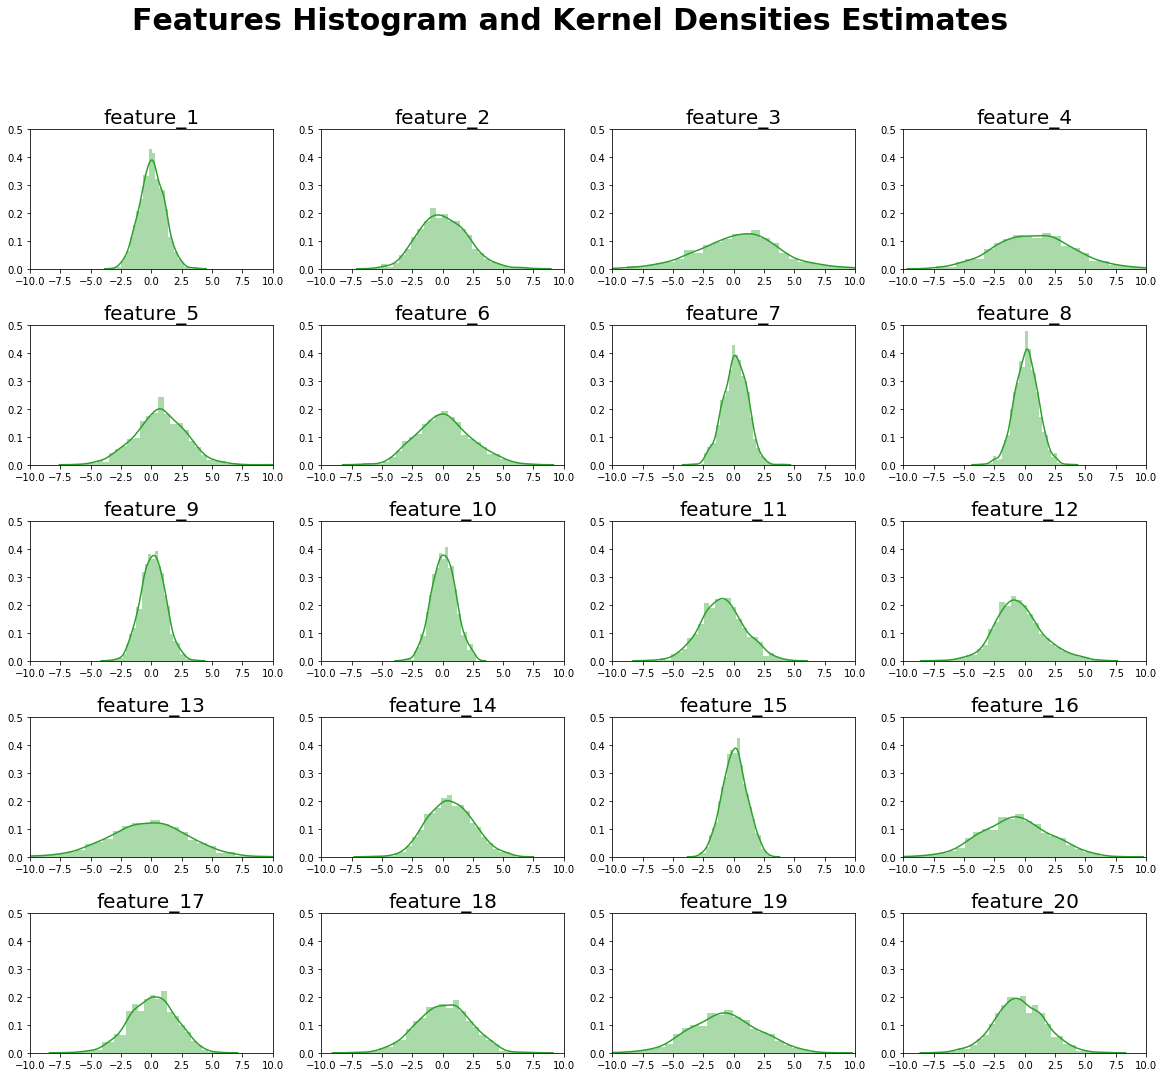

In [6]:
# Set rows and columns
nrows = 5
ncols = 4

# Create figure
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 17))
plt.subplots_adjust(hspace=0.4)
for row in range(nrows):
    for col in range(ncols):
        i = ncols * row + col
        feature = X.columns[i]
        sns.distplot(X[feature], hist=True, kde=True, rug=False, color=color, ax=ax[row,col], axlabel=False)
        ax[row,col].set_title(label=f'feature_{i+1}', fontsize=20)
        ax[row,col].set_ylim([0,0.5])
        ax[row,col].set_xlim([-10,10])
plt.suptitle('Features Histogram and Kernel Densities Estimates', fontsize=30, weight='bold')
plt.show()

#### Feature importance using Random Forest
Use Random Forest to evaluate the importance of features on classification task.
Feature 6 is the most informative.

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


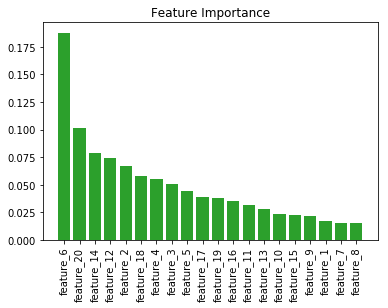

In [7]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [list(X)[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices], color=color)

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

#### Relevant features 
Consider as relevant features the ones that as a correlation greater than $0.3$ with the target. Again, features 6 is the highest correlated with the target, with a correlation value of 0.4739

In [8]:
#Create correlation matrix
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor['label'])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

label         1.000000
feature_6     0.473905
feature_20    0.313763
Name: label, dtype: float64

#### Correlation Analysis
Plot the correlation matrix, which contains correlation coefficients among the features. High collinearity may be addressed with dimensionality reduction or by dropping the redundant features. 

Text(0.5, 1.0, 'Correlation matrix')

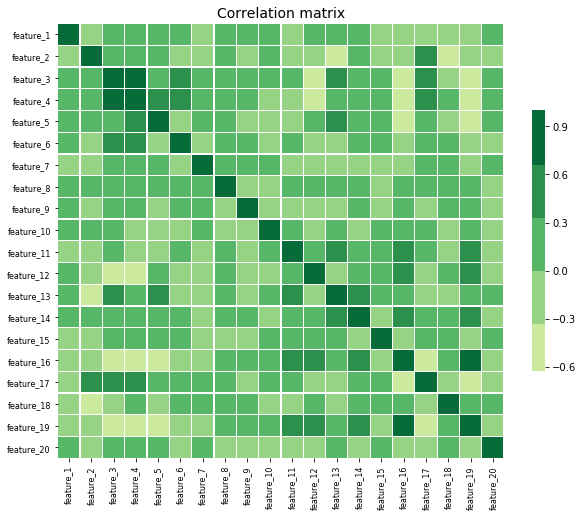

In [9]:
corr_matrix_plot = X.corr()
title = "Correlation matrix"     
f, ax = plt.subplots(figsize=(10, 8))

# Diverging colormap best for heatmap
cmap = sns.color_palette('YlGn')

# Draw the heatmap with a color bar
sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
            linewidths=.25, cbar_kws={"shrink": 0.6})

# Set the ylabels 
ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

# Set the xlabels 
ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
plt.title(title, size = 14)

#### Collinear features
Collinear features are features that are higly correlated. It is possible to see that feature 19 is higly correlated with feature 16. 
They have a correlation value of $1$. Actually, MLPClassifier is not affected by collinear features, hence, keep them.

In [10]:
# Create correlation matrix
corr_matrix = X.corr()

#Consider the absolute value
corr_matrix_abs = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Dataframe to hold correlated pairs
record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

# Iterate through the columns to drop to record pairs of correlated features
for column in to_drop:
    # Find the correlated features
    corr_features = list(upper.index[upper[column].abs() > 0.95])
    # Find the correlated values
    corr_values = list(upper[column][upper[column].abs() > 0.95])
    drop_features = [column for _ in range(len(corr_features))]    
    # Record the information (need a temp df for now)
    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                      'corr_feature': corr_features,
                                      'corr_value': corr_values})
    # Add to dataframe
    record_collinear = record_collinear.append(temp_df, ignore_index = True)

    # Print the result obtained
print('Highly correlated features\n')
record_collinear

Highly correlated features



,drop_feature,corr_feature,corr_value
0,feature_19,feature_16,1.0


# 3. Note on Multi-Layer Perceptron

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function  
$$
f(·) : R^m \rightarrow R^o
$$
by training on a dataset, where $ m $ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $ X = x_1, x_2, .., x_m $ and a target $ y $, it can learn a non-linear function approximator for either classification or regression.
***
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.
In an MLP the process of computing weighted sums is repeated multiple times, first computing hidden units that represent an intermediate processing step, which are again combined using weighted sums to yield the final result.
***
Scikit learn documentation provides pros and cons of Multi-layer perceptron, as well as some tips on pratical use.
##### Pros and Cons

The advantages of MLP are:

- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using partial_fit.

The disadvantages MLP include:

- MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

##### Tips on Practical Use

- Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to $[0, 1]$ or $[-1, +1]$, or standardize it to have mean $0$ and variance $1$. Note that you must apply the same scaling to the test set for meaningful results. 
- Finding a reasonable regularization parameter $alpha$ is best done using GridSearchCV, usually in the range $10.0 ** -np.arange(1, 7)$.
- Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. Stochastic Gradient Descent with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.

# 4. MLPClassifier without PCA

By using $GridSearch$ it is possible find the best parameters for a classifier, just give an array for each parameter and $GridSearch$ will try out every combination. When apply it set return_train_score=True, in this way the cv_results_ attribute will include training scores. Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off. However computing the scores on the training set can be computationally expensive and is not strictly required to select the parameters that yield the best generalization performance.

In addition, set $max iter = 1000$, i.e. the maximum number of iterations. The solver iterates until convergence or this number of iterations. The defult value is set to $200$ but this value does not garanteed convergence of the model. Hence, by setting $1000$ it will always procude more accurate results, even if the running time increases. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

Consider as most important parameters: $hiddenlayersize$, $alpha$, $solver$, $activation$ and $learningrate$.

This procedures implies a very long running time. Hence, in order to decrese it, run $GridSearch$ multiples times and than plot the results in a heatmap. In this way it is possible to decrease the search space of parameters.

1) Different values for $hidden layer sizes$ and L2 penalty (regularization term) parameter., i.e. $alpha$ are provided. Othere parameters are kept constant.

2) Different valuse for $solver$ and $activation$ are provided. Set as $hidden layer sizes$ and $alpha$ the optimal value founded in step 1. Other parameters are kept constant.
In the last step try different values for the learning rate and as for $hidden layer sizes$, $alpha$, $activation$ and $solver$ search just two values, that are the two best find in step 1 and 2.

3) Use two values for $hiddenlayersize$, $alpha$, $solver$ and $activation$ that gives highest accuracy and combine them in order to find the best parameter for MLPClassifier.

When evaluating the resulting model it is important to do it on held-out samples that were not seen during the grid search process: it is recommended to split the data into a development set (to be fed to the GridSearchCV instance) and an evaluation set to compute performance metrics.

In [11]:
# Set the number of splits equal 3 by default, take in consideration also the running time
skfold = StratifiedKFold(3, shuffle=True, random_state=0)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### 1) Heatmap showing how scores change with different hidden layers and different values of alpha
Parameters that may lead to the best value of accuracy:
- $hiddenlayersize = (13,)$ or $(100,)$
- $alpha = 0.1$ or $0.01$

Best combination of parameters: {'alpha': 0.1, 'hidden_layer_sizes': (13,)}


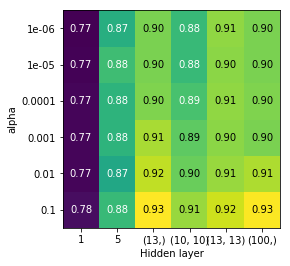

In [12]:
# Set different values for hidden layer sizes and alpha
layers = [1, 5, (13,), (10,10), (13,13), (100,)]
alphas = 10.0 ** -np.arange(1, 7)

# Set a standar Mulit-layer Perceptron
clf_std = MLPClassifier(activation='relu', solver='lbfgs', max_iter=1000, random_state=12)

# Set multiple parameters just for alpha and hidden_layer_sizes
parameters = {'hidden_layer_sizes': layers,
              'alpha': alphas,}

# Aplly grid search
grid_1 = GridSearchCV(clf_std, parameters, cv=skfold, n_jobs=-1, scoring='accuracy', 
                           return_train_score=True)

# Fit the model
grid_1.fit(X_train, y_train)

# Convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_) 

# Get the mean test score for different hidden layers sizes and alphas and reshape it in order to plot
dim1, dim2 = len(layers), len(alphas)
scores = results['mean_test_score'].values.reshape(dim1, dim2)

# Plot heatmap
mglearn.tools.heatmap(scores, xlabel='Hidden layer', xticklabels=parameters['hidden_layer_sizes'],
                      ylabel='alpha', yticklabels=parameters['alpha'], cmap="viridis")
print(f'Best combination of parameters: {grid_1.best_params_}')

#### 2) Heatmap showing how scores change with different solver and activation
Activation function for the hidden layer:

- ‘identity’, no-op activation, useful to implement linear bottleneck, returns $f(x) = x$
- ‘logistic’, the logistic sigmoid function, returns $f(x) = \frac{1}{1 + e^{-x}}$
- ‘tanh’, the hyperbolic tan function, returns $f(x) = tanh(x)$.
- ‘relu’, the rectified linear unit function, returns $f(x) = max(0, x)$
***
The solver for weight optimization:

- ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
- ‘sgd’ refers to stochastic gradient descent.
- ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba.
***
Parameters that may lead to the best value of accuracy:
- $activation = relu$ or $logistic$
- $solver = lbfgs$ or $adam$

Best combination of parameters: {'activation': 'logistic', 'solver': 'lbfgs'}


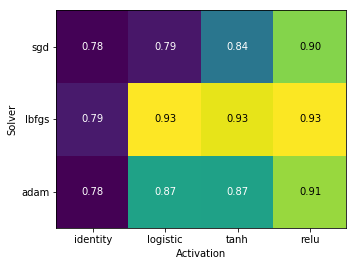

In [13]:
# Set different values for solver and activation
activation = ['identity', 'logistic', 'tanh', 'relu']
solver =['adam', 'lbfgs', 'sgd']

# Set Mulit-layer Perceptron with best values of alpha and hidden layer sizes found before
clf_std = MLPClassifier(alpha=0.1, hidden_layer_sizes=(100,), solver='lbfgs', max_iter=1000, random_state=12)

# Set multiple parameters just for alpha and hidden_layer_sizes
parameters = {'activation': activation, 
              'solver': solver, }

# Aplly grid search
grid_2 = GridSearchCV(clf_std, parameters, cv=skfold, n_jobs=-1, scoring='accuracy', 
                      return_train_score=True)

# Fit the model
grid_2.fit(X_train, y_train)

# Convert to DataFrame
results = pd.DataFrame(grid_2.cv_results_) 

# Get the mean test score for different activations and solvers and reshape it in order to plot
dim1, dim2 = len(activation), len(solver)
scores = results['mean_test_score'].values.reshape(dim1, dim2).T

# Plot heatmap
mglearn.tools.heatmap(scores, xlabel='Activation', xticklabels=parameters['activation'],
                      ylabel='Solver', yticklabels=parameters['solver'], cmap="viridis")
print(f'Best combination of parameters: {grid_2.best_params_}')

#### 3) Find best parameters for MLPClassifier with 2 options for each of them
Also search for the best $learning rate$

In [14]:
# Set standard Mulit-layer Perceptron 
clf_std = MLPClassifier(max_iter=1000, random_state=12)

# Set parameters for the MLP Classifier
parameters = {'activation': ['relu', 'logistic'], 
              'solver': ['lbfgs', 'adam'], 
              'learning_rate': ['constant', 'adaptive'], 
              'alpha': [0.1, 0.01], 
              'hidden_layer_sizes': [(100,), (13,)]} 
# Aplly grid search
grid_no_pca = GridSearchCV(clf_std, parameters, cv=skfold, n_jobs=-1, scoring='accuracy',
                          return_train_score=True)
# Fit grid search
grid_no_pca.fit(X_train, y_train)

# Print result
print("-----------------PARAMETER TUNING--------------------")
print("Parameter setting that gave the best results on the hold out data:")
print(f'{grid_no_pca.best_params_}\n')
print('Therefore, the best estimator, i.e. estimator which gave highest score on the left out data:')
print(f'{grid_no_pca.best_estimator_}\n')
print("Mean cross-validated score: %0.4f" % grid_no_pca.best_score_)
print("Test set score: {:.2f}".format(grid_no_pca.score(X_test, y_test)))

-----------------PARAMETER TUNING--------------------
Parameter setting that gave the best results on the hold out data:
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (13,), 'learning_rate': 'constant', 'solver': 'lbfgs'}

Therefore, the best estimator, i.e. estimator which gave highest score on the left out data:
MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=12, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Mean cross-validated score: 0.9322
Test set score: 0.91


In [15]:
# Get the result
results = pd.DataFrame(grid_no_pca.cv_results_)
# Show firs 5 row
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.385010,1.115242,0.004273,0.000980,relu,0.1,"(100,)",constant,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",...,0.946667,0.933110,0.931111,0.013575,5,1.0,1.0,1.000000,1.000000,0.000000
1,1.400377,0.444373,0.003247,0.000319,relu,0.1,"(100,)",constant,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",...,0.926667,0.889632,0.908889,0.015140,13,1.0,1.0,0.916805,0.972268,0.039218
2,2.788204,1.245461,0.006025,0.003710,relu,0.1,"(100,)",adaptive,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",...,0.946667,0.933110,0.931111,0.013575,5,1.0,1.0,1.000000,1.000000,0.000000
3,1.714176,0.590305,0.003369,0.000295,relu,0.1,"(100,)",adaptive,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",...,0.926667,0.889632,0.908889,0.015140,13,1.0,1.0,0.916805,0.972268,0.039218
4,0.903927,0.329896,0.003052,0.000527,relu,0.1,"(13,)",constant,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",...,0.946667,0.933110,0.932222,0.012161,1,1.0,1.0,1.000000,1.000000,0.000000


#### Apply the model with best parameters
Fit the classifier with the parameters that yielded the best score in the grid search. We use the attribute *best_estimator_* which is an estimator, of the variable *grid_search*.

In [16]:
# MLPClassifier with the best combination of parameters
best_mlp = grid_no_pca.best_estimator_

# Get cross-validation scorse using 10 splits
scores_mlp = cross_val_score(best_mlp, X, y, cv=10, scoring='accuracy')

# Print the mean
print('Mean cross-validation score =', np.mean(scores_mlp))

Mean cross-validation score = 0.91334375072343


#### Compare result with scaling
It is worth noticing that feature standardization does not improve the performance of the model, even if it is higly recomended. One possible reason is that features have mean $0$, as it possible to see in the features kernel density estimation in the data exploration part. Hence standardize data points does not change the dataset so much. In order to compare the results use pipeline, which encapsulate all the processing steps in our machine learning workflow in a single scikit-learn estimator. 

In [17]:
# Create pipeline
pipe = make_pipeline(StandardScaler(), best_mlp)

# Get cross-validation scores
res = cross_val_score(pipe, X, y, cv=10, scoring='accuracy')

# Print the mean
print('Mean cross-validation score with feature scaling =', np.mean(res))

Mean cross-validation score with feature scaling = 0.9075100701437601


# 5. MLPClassifier  with PCA
Principal Component Analysis (PCA) is an unsupervised transformation that gives a lower-dimensional representation of the dataset, while only losing a small amount of information. This technique is widely used for data visualization, reduce noise or decrease the computational load.

PCA decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance, that is the most informative. Hence, it is possible to discard directions with less variance, the ones the contains less information, without introducing too many errors.

PCA assumes that data points have mean $0$. This is quite a good assumption for our dataset, as it is possible to see in the features kernel density estimation in the data exploration part. However, in order to get the best result, try to scale the data using $StandardScaler$ and compare the scores.

In scikit-learn, PCA is implemented as a *transformer* object that learns $n$ components in its $fit$ method, and can be used on new data to project it on these components.
#### Data visualization
As for viualization, standardize the dataset.

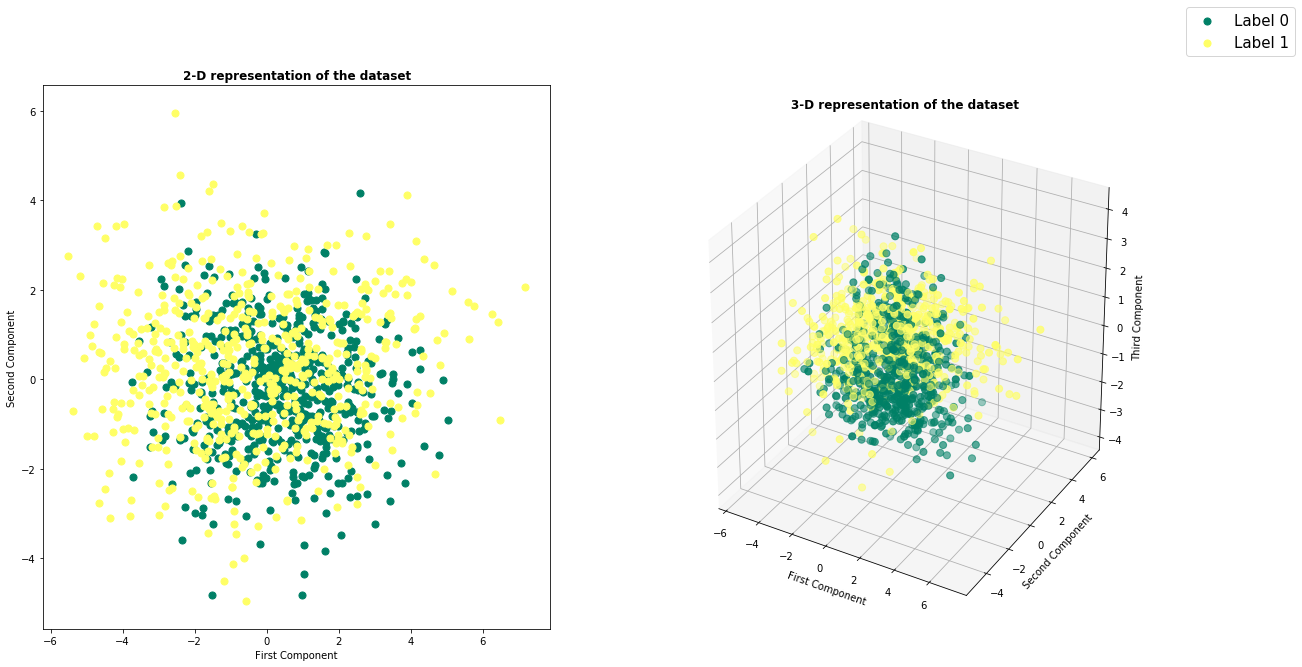

In [18]:
# Standardize the data
std = StandardScaler().fit(X)
X_std = std.transform(X)

#Create figure
fig = plt.figure(figsize=(20,10))

# Conduct PCAs
pca_2 = PCA(n_components=2).fit_transform(X_std)
pca_3 = PCA(n_components=3).fit_transform(X_std)

# Two-dimensional representation of the dataset, i.e. PCA with 2 principal components
ax1 = fig.add_subplot(1,2,1)
for i in range(2):
    ind = (y==i)
    ax1.scatter(pca_2[ind,0], pca_2[ind,1], c=[cm[i]], label=f'Label {i}', marker='o', s=50)
#Set axes and title
ax1.set_xlabel('First Component')
ax1.set_ylabel('Second Component')
ax1.set_title('2-D representation of the dataset', weight='bold')

# Three-dimensional representation of the dataset, i.e. PCA with 3 principal components
ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(pca_3[:,0], pca_3[:,1], pca_3[:,2], c=y, cmap=plt.cm.summer, marker='o', s=50)
ax2.set_title('3-D representation of the dataset\n', weight='bold')
ax2.set_xlabel('First Component')
ax2.set_ylabel('Second Component')
ax2.set_zlabel('Third Component')

fig.legend(prop={'size':15})
plt.show()

#### Choosing the number of components
A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

This curve quantifies how much of the total, 20-dimensional variance is contained within the first $ N $ components. For example, we see that with the first 4 components contain approximately 75% of the variance, while you need around 14 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 8 components to retain 90% of the variance.

Text(0.5, 1.0, 'Cumulative explained variance ratio\n')

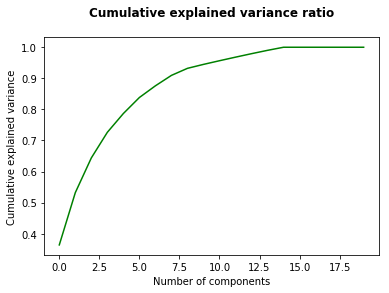

In [19]:
# Conduct PCA
pca = PCA().fit(X)

# Plot cumulative explained variance ratio as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='green')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance ratio\n', weight='bold')

#### Graph showing score (accuracy) as a function of number of components of PCA
PCA centers but does not scale the input data for each feature. The optional parameter parameter $whiten=True$ makes it possible to project the data onto the singular space while scaling each component to unit variance. 

By default, if the $ncomponents$ is not specified, PCA keeps all components.

The graph shows that the highest score is achieved with 8 or 9 components, after implement $GridSearchCV$ in order to understand which is the optimal choice.

Text(0.5, 1.0, 'Accuracy and PCA components')

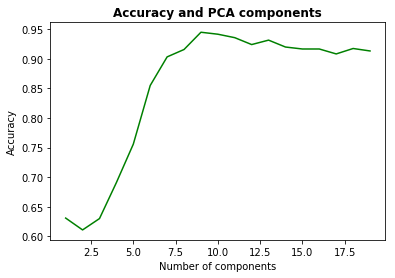

In [20]:
# Use a standar Multi-Layer Perceptron, i.e. not with the optimal set of parameters
mlp_std = MLPClassifier(solver='lbfgs', alpha=0.01, random_state=12) 

# Apply PCA and fit the model with X and apply the dimensionality reduction on X
X_pca = PCA(whiten=True).fit_transform(X)
dim = X_pca.shape[1]

# Set scores to an empty list
scores = []

# Get different cross-validation score for different number of components
for i in range(1, dim):
    score = cross_val_score(mlp_std, X_pca[:, 0:i], y, cv=skfold, scoring='accuracy')
    scores.append(score.mean())
plt.plot(range(1, dim), scores, color='green')
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy and PCA components', weight='bold')

### Find the optimal configuration using GridSearchCV

By combining $GridSearchCV$ and $Pipeline$ it is possibile to understand which is the best model to use. The purpose of $pipeline$ is to assemble several steps that can be cross-validated together while setting different parameters. In order to decrease the computational load, split the process into:

1) find the best steps, which means find the optimal combination of preprocessing of data and which transformation to use to reduce dimension, by also setting parameters for them;

2) given the optimal conbination of steps, find the best parameters of MLPClassifier.

#### 1) Find optimal steps of preprocess and dimensionality reduction technique using GridSearchCV
As for preprocessing of the data try with scaling by using $StandardScaler$ and without, by setting $None$.
As for dimensionality reduction try both $PCA$ and $KernelPCA$, which is an extension of $PCA$ that achieves non-linear dimensionality reduction through the use of kernels. Look also for the best number of components, 8 or 9, and best kernel, liner or rbf, i.e. radial basis function.

In [21]:
# Create a standar classifier
clf_std = MLPClassifier(max_iter=1000, random_state=12)

# Get the estimators 
estimators = [('preprocessing', StandardScaler()), ('reduce_dim', PCA(whiten=True)), ('clf', clf_std)]

# Create pipeline
pipe = Pipeline(estimators)

# Create space of candidate values of different preprocessing and dimensionality reduction steps
search_space_steps = [{'reduce_dim__n_components': [8, 9]},                                      #scaling + PCA
                {'reduce_dim': [KernelPCA()], 'reduce_dim__kernel': ['linear', 'rbf'], 
                                              'reduce_dim__n_components': [8, 9]},         #scaling + KernelPCA
                {'preprocessing': [None], 'reduce_dim__n_components': [8, 9]},               # no scaling + PCA
                {'preprocessing': [None], 'reduce_dim': [KernelPCA()], 'reduce_dim__kernel': ['linear', 'rbf'],
                                        'reduce_dim__n_components': [8, 9]}]           # no scaling + KernelPCA
# Create grid search 
grid_steps = GridSearchCV(pipe, search_space_steps, cv=skfold, n_jobs=-1)

# Fit grid search
grid_steps.fit(X_train, y_train)

# Print results
print("-----------------PARAMETER TUNING--------------------")
print("Parameter setting that gave the best results on the hold out data:\n")
print(f'{grid_steps.best_params_}\n')
print('Therefore, the best estimator, i.e. estimator which gave highest score on the left out data:\n')
print(f'{grid_steps.best_estimator_}\n')
print("Mean cross-validated score: %0.4f" % grid_steps.best_score_)
print("Test set score: {:.2f}".format(grid_steps.score(X_test, y_test)))

-----------------PARAMETER TUNING--------------------
Parameter setting that gave the best results on the hold out data:

{'preprocessing': None, 'reduce_dim': KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=9, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0), 'reduce_dim__kernel': 'linear', 'reduce_dim__n_components': 9}

Therefore, the best estimator, i.e. estimator which gave highest score on the left out data:

Pipeline(memory=None,
     steps=[('preprocessing', None), ('reduce_dim', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=9, n_jobs=None,
     random_state=None, remove_zero_eig=False, ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start

#### 2) Find optimal parameters for MLPClassifier using GridSearchCV
Use as a steps, no feature scaling and KernelPCA with 9 components and linear kernel. This is the best combination found before.

In [24]:
# Create a standar classifier
clf_std = MLPClassifier(max_iter=1000, random_state=12)

# Set the optimal steps
estimators = [('preprocessing', None), ('reduce_dim', KernelPCA(9, kernel='linear')), ('clf', clf_std)]

# Create pipeline
best_pipe = Pipeline(estimators)

# Create space of candidate values of parameters for MLPClassifier
search_space_params = {'clf__alpha': 10.0 ** -np.arange(1, 7),
                       'clf__hidden_layer_sizes': [(13,), (100,)],
                       'clf__solver': ['lbfgs', 'sgd'],
                       'clf__activation': ['logistic', 'relu']}

# Create grid search 
grid_params = GridSearchCV(best_pipe, search_space_params, cv=skfold, n_jobs=-1)

# Fit grid search
grid_params.fit(X_train, y_train)

# Print results
print("-----------------PARAMETER TUNING--------------------")
print("Parameter setting that gave the best results on the hold out data:\n")
print(f'{grid_params.best_params_}\n')
print('Therefore, the best estimator, i.e. estimator which gave highest score on the left out data:\n')
print(f'{grid_params.best_estimator_}\n')
print("Mean cross-validated score: %0.4f" % grid_params.best_score_)
print("Test set score: {:.2f}".format(grid_params.score(X_test, y_test)))

-----------------PARAMETER TUNING--------------------
Parameter setting that gave the best results on the hold out data:

{'clf__activation': 'logistic', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (100,), 'clf__solver': 'lbfgs'}

Therefore, the best estimator, i.e. estimator which gave highest score on the left out data:

Pipeline(memory=None,
     steps=[('preprocessing', None), ('reduce_dim', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=9, n_jobs=None,
     random_state=None, remove_zero_eig=False, ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))])

Mean cross-validated score: 0.9422
Test set score: 0.95


#### Apply the model with optimal parameters and steps
Then, fit the classifier with the parameters that yielded the best score in the grid search. We use the attribute *best_estimator_* which is an estimator, of the variable *grid_search*.
Recall that using multiple $GridSearch$ we find optimal:

In [25]:
# MLPClassifier with the best combination of parameters
best_mlp_pca = grid_params.best_estimator_

# Get cross-validation scorse using 10 splits
scores_pca = cross_val_score(best_mlp_pca, X, y, cv=10, scoring='accuracy')

# Print the mean
print('Mean cross-validation score =', np.mean(scores_pca))

Mean cross-validation score = 0.959109255272357


# 6. Compare results
Use boxplot to compare the scores achieved with optimal parameters for MLPClassifier with and without PCA, stored respectively in $scores_mlp$ and $scores_pca$. There are $10$ value of accuracy since we splits into ten different cross-vlidation set,

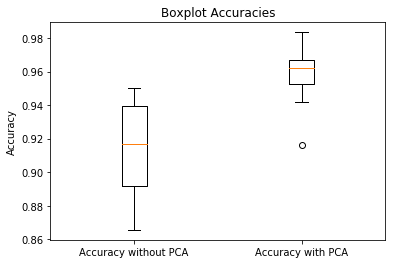

In [26]:
#Boxplot of the accuracies
ax = plt.boxplot([scores_mlp, scores_pca], labels = ['Accuracy without PCA', 'Accuracy with PCA'])
plt.title('Boxplot Accuracies')
plt.ylabel('Accuracy')
plt.show()

# 7. Conclusion
In conclusion, as it possible to see in the boxplot, the optimal strategy for performing classification on this dataset is given by applying PCA. The optimal parameters of the final selected model are:

In [27]:
for step in best_mlp_pca.steps:
    name, param = step
    print(name + ':')
    print(param)
    print()

preprocessing:
None

reduce_dim:
KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=9, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)

clf:
MLPClassifier(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=12, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)



#### Confusion matrix
Used it to evaluate the quality of the output of a classifier. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [30]:
# Function to plot confusion matrix (taken from Scikit learn documentation)
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[581  26]
 [ 27 566]]


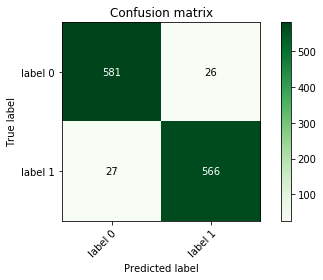

In [31]:
# Get prediction using 5 splits
y_pred = cross_val_predict(best_mlp_pca, X, y, cv=10)
# Plot confusion matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(y, y_pred, classes=np.array(['label 0', 'label 1']),
                      title='Confusion matrix')

# 8. References

- A.C. Muller, S. Guido. *Introduction to Machine Learnign with Pyhton*. O'Reilly, 2016
- J. Rogel-Salazar. *Data Science and Analytics with Python*. Chapman & Hall/CRC, 2017
- J. VanderPlas. *Python Data Science Handbook*. O'Reilly, 2016
- Scikit Learn documentation. https://scikit-learn.org/stable/documentation.html
- Kaggle - Learn. https://www.kaggle.com/learn/overview
- Chris Albon - Blog https://chrisalbon.com/